<a href="https://colab.research.google.com/github/VANESSA042003/Aprilia/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving inflation+research+abstracts+classification.zip to inflation+research+abstracts+classification.zip


In [ ]:
list(uploaded.keys())

['inflation+research+abstracts+classification.zip']

In [ ]:
import os
os.rename("inflation+research+abstracts+classification.zip", "inflation.zip")

In [ ]:
import zipfile
with zipfile.ZipFile("inflation.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/inflation_data")

In [ ]:
import os
os.listdir("/content/inflation_data")

['classified_abstracts.json']

In [ ]:
import pandas as pd
df = pd.read_json("/content/inflation_data/classified_abstracts.json")
df.head()

,DOI,Abstract,Label
0,10.1155/2021/1071145,Forward-looking forecasting of the inflation r...,1
1,10.1007/s43546-022-00384-2,Our study examined the disaggregation of infla...,1
2,10.1002/for.2667,This paper develops a dynamic factor model tha...,0
3,10.1007/s42973-021-00091-x,"In this paper, I use a simple SIR Macro model ...",0
4,10.1007/s40258-012-0003-z,BackgroundGame theory is useful for identifyin...,0


In [ ]:
# Display the shape of the dataframe
print(df.shape)

(1138, 3)


In [ ]:
df.columns

Index(['DOI', 'Abstract', 'Label'], dtype='object')

In [ ]:
import pandas as pd

df = pd.read_json("/content/inflation_data/classified_abstracts.json")
df.head()

,DOI,Abstract,Label
0,10.1155/2021/1071145,Forward-looking forecasting of the inflation r...,1
1,10.1007/s43546-022-00384-2,Our study examined the disaggregation of infla...,1
2,10.1002/for.2667,This paper develops a dynamic factor model tha...,0
3,10.1007/s42973-021-00091-x,"In this paper, I use a simple SIR Macro model ...",0
4,10.1007/s40258-012-0003-z,BackgroundGame theory is useful for identifyin...,0


In [ ]:
df.columns

Index(['DOI', 'Abstract', 'Label'], dtype='object')

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.columns.tolist()

['DOI', 'Abstract', 'Label']

In [ ]:
df['Label'].value_counts()

,count
Label,
0,900
1,238


In [ ]:
df[['Abstract', 'Label']].head()

,Abstract,Label
0,Forward-looking forecasting of the inflation r...,1
1,Our study examined the disaggregation of infla...,1
2,This paper develops a dynamic factor model tha...,0
3,"In this paper, I use a simple SIR Macro model ...",0
4,BackgroundGame theory is useful for identifyin...,0


In [ ]:
df.columns = df.columns.str.lower()
df.columns.tolist()

['doi', 'abstract', 'label']

In [ ]:
print(df['label'].head())

0    1
1    1
2    0
3    0
4    0
Name: label, dtype: int64


In [ ]:
df.columns = df.columns.str.strip().str.lower()

In [ ]:
df['label'].value_counts()

,count
label,
0,900
1,238


In [ ]:
df['manual_kode'] = ''
df.head()

,doi,abstract,label,manual_kode
0,10.1155/2021/1071145,Forward-looking forecasting of the inflation r...,1,
1,10.1007/s43546-022-00384-2,Our study examined the disaggregation of infla...,1,
2,10.1002/for.2667,This paper develops a dynamic factor model tha...,0,
3,10.1007/s42973-021-00091-x,"In this paper, I use a simple SIR Macro model ...",0,
4,10.1007/s40258-012-0003-z,BackgroundGame theory is useful for identifyin...,0,


In [ ]:
df.to_csv('/content/abstracts_for_manual_coding.csv', index=False)

from google.colab import files
files.download('/content/abstracts_for_manual_coding.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
sample_df = df[['abstract']].head(10).copy()

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
sample_df = df[['abstract']].head(10).copy()

In [ ]:
!pip install -q scikit-learn

import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df.columns = df.columns.str.lower()


In [ ]:
sample_df = df[['abstract']].head(10).copy()

In [ ]:
sample_df['cleaned'] = sample_df['abstract'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))

In [ ]:
vec = CountVectorizer(stop_words='english')
X = vec.fit_transform(sample_df['cleaned'])

In [ ]:
words = vec.get_feature_names_out()
top_keywords = []

In [ ]:
for row in X.toarray():
    word_freq = list(zip(words, row))
    word_freq_sorted = sorted(word_freq, key=lambda x: x[1], reverse=True)
    top = [w for w, f in word_freq_sorted if f > 0][:3]

In [ ]:
top_keywords.append(', '.join(top))

In [ ]:
print("Jumlah baris sample_df:", len(sample_df))
print("Jumlah keyword hasil ekstraksi:", len(top_keywords))

Jumlah baris sample_df: 10
Jumlah keyword hasil ekstraksi: 1


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
sample_df = df[['abstract']].dropna().head(10).copy()

In [ ]:
sample_df['cleaned'] = sample_df['abstract'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))


In [ ]:
vec = CountVectorizer(stop_words='english')
X = vec.fit_transform(sample_df['cleaned'])

In [ ]:
words = vec.get_feature_names_out()

In [ ]:
top_keywords = []
for i in range(X.shape[0]):
    row = X[i].toarray().flatten()
    freq_pairs = list(zip(words, row))
    sorted_words = sorted(freq_pairs, key=lambda x: x[1], reverse=True)
    top = [word for word, freq in sorted_words if freq > 0][:3]
    top_keywords.append(', '.join(top))

In [ ]:
sample_df['manual_kode'] = top_keywords

In [ ]:
sample_df[['abstract', 'manual_kode']]

,abstract,manual_kode
0,Forward-looking forecasting of the inflation r...,"inflation, rate, better"
1,Our study examined the disaggregation of infla...,"inflation, cpi, nigeria"
2,This paper develops a dynamic factor model tha...,"output, inflation, gap"
3,"In this paper, I use a simple SIR Macro model ...","lockdown, model, policy"
4,BackgroundGame theory is useful for identifyin...,"framework, insurer, pricing"
5,"BACKGROUND: Between 2010 and 2020, the New Zea...","price, brands, tobacco"
6,"For decades, Western societies have experience...","educational, segments, change"
7,When prediction intervals are constructed usin...,"statistic, heteroscedastic, heteroscedasticity"
8,OBJECTIVE: The objective of this study was to ...,"medicare, period, waiting"
9,Money demand is one of the most important econ...,"method, demand, money"


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

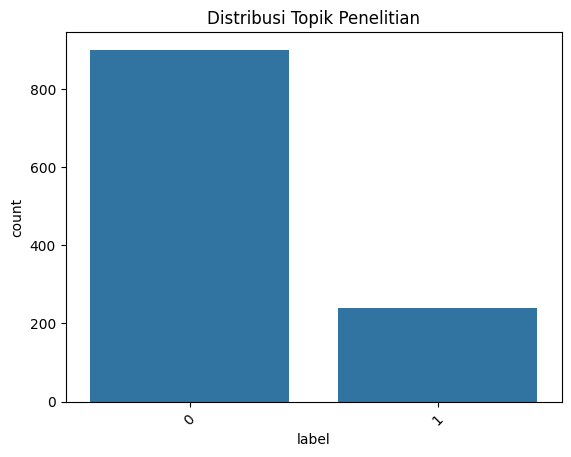

In [ ]:
sns.countplot(data=df, x='label')
plt.xticks(rotation=45)
plt.title("Distribusi Topik Penelitian")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [ ]:
df = df.dropna(subset=['abstract', 'label'])
X = df['abstract']
y = df['label']

In [ ]:
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       182
           1       1.00      0.41      0.58        46

    accuracy                           0.88       228
   macro avg       0.94      0.71      0.76       228
weighted avg       0.90      0.88      0.86       228



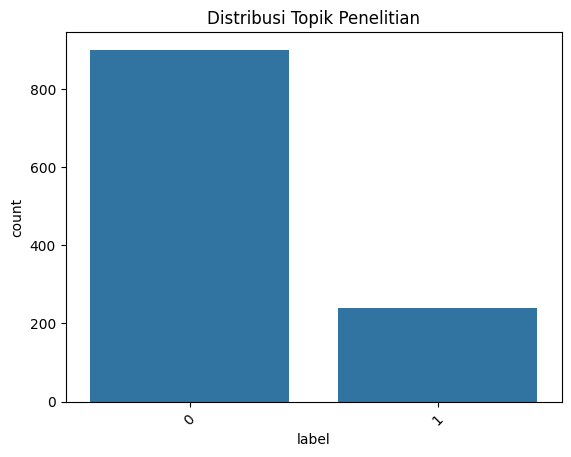

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title('Distribusi Topik Penelitian')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df[['abstract', 'manual_kode', 'label']].head(10)

,abstract,manual_kode,label
0,Forward-looking forecasting of the inflation r...,,1
1,Our study examined the disaggregation of infla...,,1
2,This paper develops a dynamic factor model tha...,,0
3,"In this paper, I use a simple SIR Macro model ...",,0
4,BackgroundGame theory is useful for identifyin...,,0
5,"BACKGROUND: Between 2010 and 2020, the New Zea...",,1
6,"For decades, Western societies have experience...",,0
7,When prediction intervals are constructed usin...,,0
8,OBJECTIVE: The objective of this study was to ...,,0
9,Money demand is one of the most important econ...,,1


In [ ]:
from wordcloud import WordCloud

In [ ]:
text = " ".join(abstract for abstract in df['abstract'].dropna())

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(text)

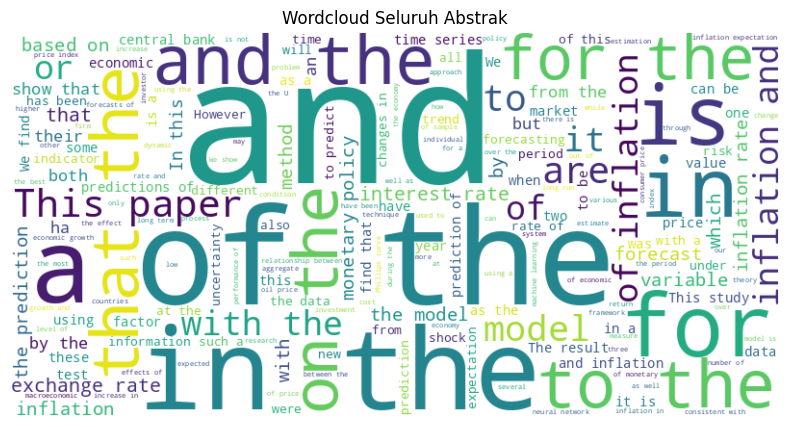

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Seluruh Abstrak')
plt.show()

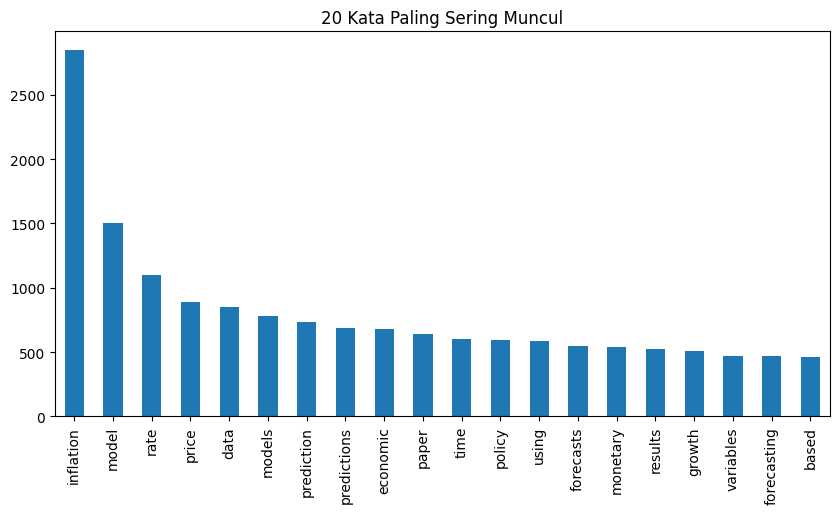

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vec = CountVectorizer(stop_words='english', max_features=20)
X = vec.fit_transform(df['abstract'].dropna())
word_freq = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
word_freq.sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='20 Kata Paling Sering Muncul')
plt.show()

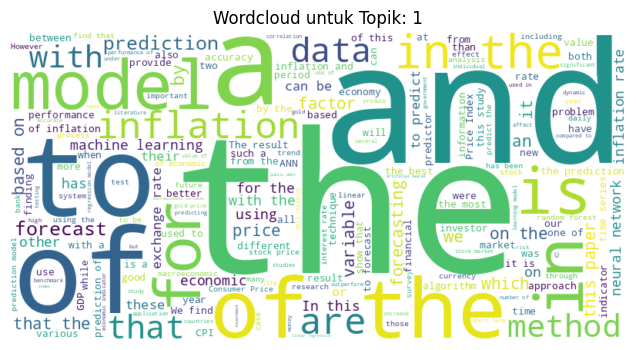

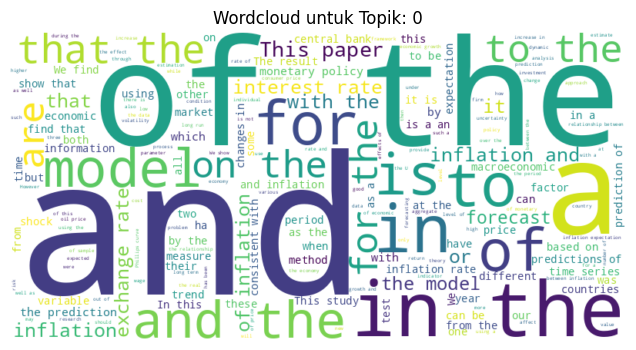

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

labels = df['label'].unique()
for label in labels:
    text = " ".join(df[df['label'] == label]['abstract'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(text)

    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Wordcloud untuk Topik: {label}')
    plt.show()

In [ ]:
from collections import Counter

In [ ]:
all_keywords = []
df['manual_kode'].dropna().apply(lambda x: all_keywords.extend(x))

,manual_kode
0,None
1,None
2,None
3,None
4,None
...,...
1133,None
1134,None
1135,None
1136,None


In [ ]:
keyword_counts = Counter(all_keywords)

In [ ]:
pd.DataFrame(keyword_counts.most_common(10), columns=['Keyword', 'Frekuensi'])

,Keyword,Frekuensi


In [ ]:
from IPython.display import Markdown as md